<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data

# define url path for zip folder
url_zip_path = "https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip"

# Read the csv file directly from zip archive using pandas
# - compression='zip' tells pandas the file is zipped
# - sep=',' specifies comma-separated values
data = pd.read_csv(url_zip_path, compression= 'zip', sep=",")

# Create dataset copy
df = data.copy()

# Display top5 rows of the DataFrame
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Convert column names 
# - Convert all column names to lowercase
# - Remove leading/trailing whitespaces
# - Replace spaces with underscores for consistency

new_cols = []

for col in list(df.columns):
    new_col = col.lower().strip().replace(" ", "_")
    new_cols.append(new_col)

# Reassign cleaned column names back to the DataFrame
df.columns = new_cols

# Verify column name changes
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Define dictionary for quick columns description
# Create a dictionary to describe each column in the dataset
# Key -> column name
# Value -> short explanation of what the column means

description_cols = {
    'channel': 'Shows how the customer buys products. (1 = Horeca and 2= Retail)',
    'region': 'Shows where the customer is located (1 = Lisbon, 2 = Oporto and 3= Others)',
    'fresh': 'Annual spending on fresh products',
    'milk': 'Annual spending on milk and dairy products',
    'grocery': 'Annual spending on grocery products',
    'frozen': 'Annual spending on frozen products',
    'detergents_paper': 'Annual spending on detergents and paper products',
    'delicassen': 'Annual spending on delicatessen products, such as ready-to-eat or luxury food items'
}

def all_cols_description():
    for col, val in description_cols.items():
        print(f"{col}: {val}")

def col_description(col:str):
    return description_cols[col]

col_description('region')             # call this function to get quick columns description

'Shows where the customer is located (1 = Lisbon, 2 = Oporto and 3= Others)'

### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
# Your code here:

print("columns description:")
all_cols_description()

columns description:
channel: Shows how the customer buys products. (1 = Horeca and 2= Retail)
region: Shows where the customer is located (1 = Lisbon, 2 = Oporto and 3= Others)
fresh: Annual spending on fresh products
milk: Annual spending on milk and dairy products
grocery: Annual spending on grocery products
frozen: Annual spending on frozen products
detergents_paper: Annual spending on detergents and paper products
delicassen: Annual spending on delicatessen products, such as ready-to-eat or luxury food items


In [6]:
# Shape of the DataFrame
df.shape

(440, 8)

In [7]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   channel           440 non-null    int64
 1   region            440 non-null    int64
 2   fresh             440 non-null    int64
 3   milk              440 non-null    int64
 4   grocery           440 non-null    int64
 5   frozen            440 non-null    int64
 6   detergents_paper  440 non-null    int64
 7   delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


- The dataset has 440 rows. Each row shows the purchase of one customer from a wholesale distributor.

- The dataset has 8 columns.

- All columns are numeric, so we do not need to change any data types.

- There are no missing values in the dataset.

#### Descriptive statistics

In [8]:
df.describe()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


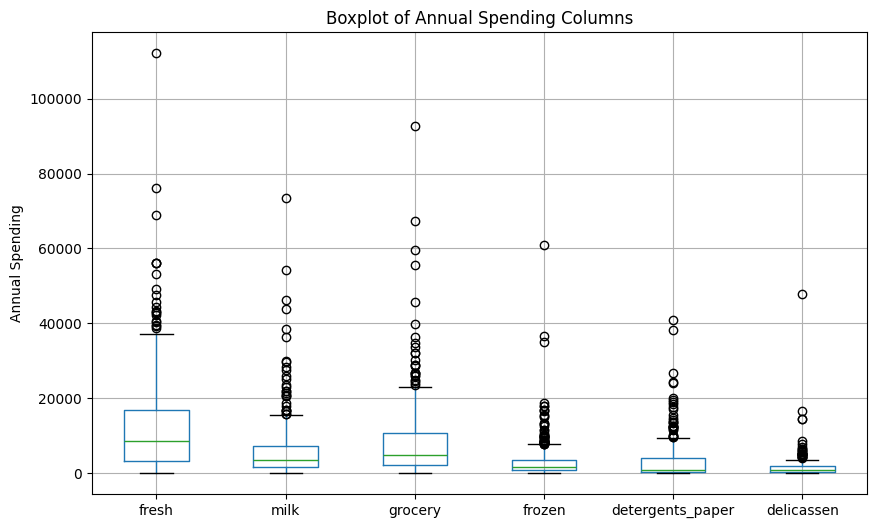

In [9]:
# Drop column channel and region
# We drop them because:
# - They are discrete columns
# - They do not contain extreme values 
cols_to_plot = df.drop(columns=['channel', 'region'])

# create a list to plot columns
cols_list_to_plot = list(cols_to_plot.columns)

plt.figure(figsize=(10, 6))
df[cols_list_to_plot].boxplot()
plt.xticks(rotation=0)
plt.title("Boxplot of Annual Spending Columns")
plt.ylabel("Annual Spending")
plt.show()

- Many outliers are present in every category

- Column `fresh`, `milk`and `grocery` have the largest outliers.

**Impotant point:** Scales differ significantly in each features

**What does this mean for the K-Means algorithm?**
- K-Means is sensitive to large values because it uses Euclidean distance.

- Very large values can dominate distance calculations and pull cluster centroids toward them.

**But wait! Are you sure these are outliers?**
- These extreme values may not be anomalies or errors.

- They likely represent customers who purchase in very large quantities.

- Therefore, removing these values may remove meaningful customer segments.

#### Distribution Plot

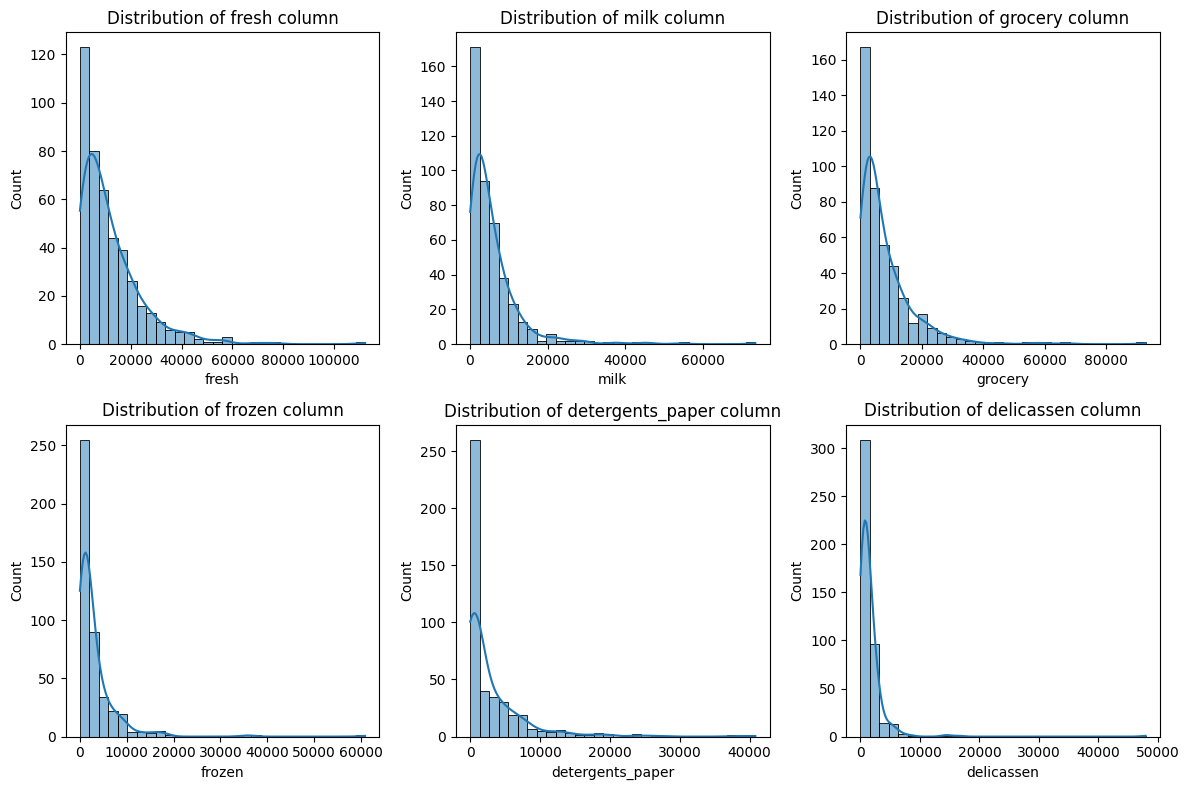

In [10]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_list_to_plot, start= 1):
    plt.subplot(2, int(len(cols_list_to_plot)/2), i)
    sns.histplot(df[col], bins=30, kde= True)
    plt.title(f"Distribution of {col} column")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Your observations here**

- Overall, all columns are right-skewed and contain outlier

- Fresh and Grocery have very large values for some customers.

- Milk and Detergents_Paper also show high values for a few customers.

- Frozen and Delicassen mostly have small values, with a few very large ones.


**Now the question arises. Should we remove these outliers?**
 
- We will use K-Means clustering, which is sensitive to outliers.

- We have only **440 records**, which is already a **small** dataset.

- Removing outliers would:

    - Reduce the data size.
    - Remove important high-value customers.


**What should we do instead?**

- We will not remove these outliers. We keep them but we scale the data to reduce the affect of large values. 


#### Correlation Score

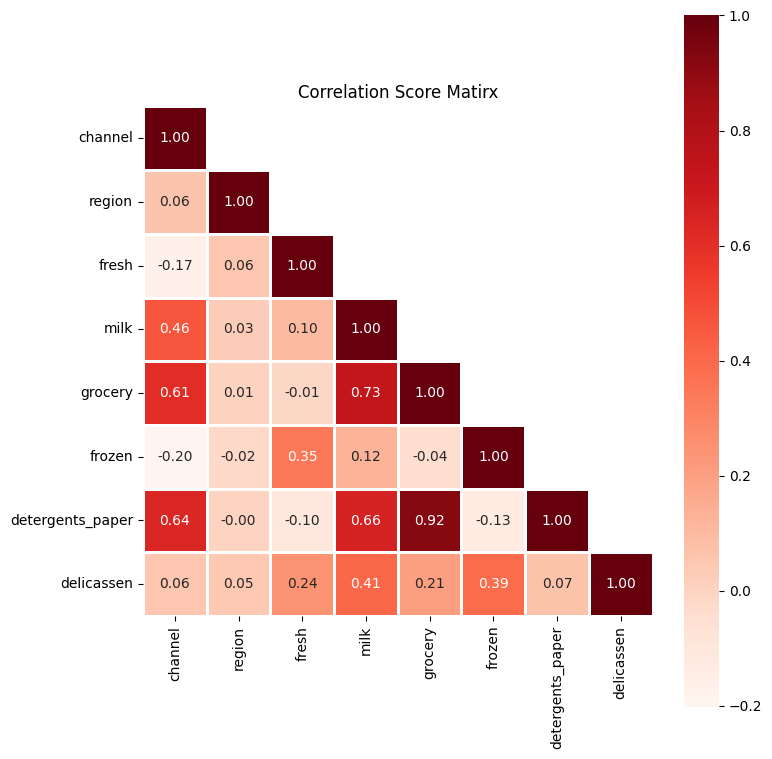

In [11]:
# Plot heatmap to see correlation score
corr_score = df.corr()

mask = np.triu(np.ones_like(corr_score, dtype= bool), k=1)
corr_mask = np.abs(corr_score) <= 50
plt.figure(figsize=(8, 8))
sns.heatmap(
    data= corr_score,
    annot= True,
    fmt= '.2f',
    cmap= "Reds",
    linewidths= 0.8,
    # linecolor='Black',
    mask= mask,
    square= True
)
plt.title("Correlation Score Matirx")
plt.tight_layout()
plt.show()


- ``grocery`` -> ``detergents_paper`` = 0.92; which is very strong positive correlation.

- ``milk`` -> ``grocery`` = 0.73; which is strong correlation.

- ``milk`` -> ``detergents_paper`` = 0.66; moderate correlation

**What we can do here?**
- We have see that some features are intercorrelated. Either we can drop one of the highly correlated feature.

- In this case we have  grocery/detergents_paper feature which is highly correlated with each other and milk feature as. 

- Drop one of the feature form grocery/detergents_paper will reduce the colinearity between features. 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
# Your code here

# The dataset does not require basic cleaning because:
# - There are no missing values
# - All columns are numeric

# However, the data contains outliers and features with very different value ranges. How to treat them?

# Possible approaches:
# 1. Remove outliers -> reduces dataset size and may remove meaningful customer segments
# 2. Scale the features -> reduces the impact of large values while keeping all data

# Since K-Means is sensitive to feature scale and large values (Euclidean distance),
# feature scaling is necessary if outliers are not removed.

# Decision:
# - No outlier removal at this stage
# - Apply feature scaling to minimize the influence of outliers

# Bye! Bye! I will skip this part for the moment.
# No treatment to outliers. 

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [13]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

# Initialize the scaler
scaler = StandardScaler()

# Scale the data 
# Create a separate scaled datset for k-means
customers_scale_kmeans = scaler.fit_transform(df)                       # Scaled dataset for k-means

customers_scale_kmeans = pd.DataFrame(customers_scale_kmeans, columns= df.columns)

customers_scale_kmeans.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [15]:
# Verify original dataset is unchanged
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Note**

- column ``channel`` and ``region`` can be excluded from the scaling because these values are discrete values.

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
from sklearn.cluster import KMeans

# Your code here:

# Initialize K-Means (choose k = 2 as a starting point)
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=20)

# Fit K-Means on the scaled data
kmeans_2.fit(customers_scale_kmeans)

# Get cluster labels
kmeans_2_labels = kmeans_2.labels_

# Create a copy of scaled dataset to see the labels
customers_scale_kmeans_label = customers_scale_kmeans.copy()

# Add labels to the scaled dataset
customers_scale_kmeans_label['kmeans_label'] = kmeans_2_labels

# Check result
customers_scale_kmeans_label.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmeans_label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


In [17]:
print("Unique label count:", customers_scale_kmeans_label.kmeans_label.nunique())

Unique label count: 2


In [18]:
print("Label counts:", customers_scale_kmeans_label.kmeans_label.value_counts())

Label counts: kmeans_label
0    306
1    134
Name: count, dtype: int64


In [19]:
# Silhouette Score
from sklearn.metrics import silhouette_score

# We use first scaled dataset which is without labels
kmeans_2_score = silhouette_score(customers_scale_kmeans, kmeans_2_labels)              
print(f"K-Means Silhouette Score: {kmeans_2_score:.3f}")

K-Means Silhouette Score: 0.373


- This means clusters are not properly separated and data points within the clusters are not cohesive. 

### Looking to the elbow we can choose 2 like the correct number of clusters

In [20]:
kmeans_2 = KMeans(n_clusters=2)

kmeans_2.fit(customers_scale_kmeans)

labels = kmeans_2.predict(customers_scale_kmeans)

clusters = kmeans_2.labels_.tolist()

In [21]:
print(clusters)

[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [22]:
customers_scale_kmeans_label['elbow_label'] = clusters                    # Add 'Label' column to dataset with already contain 'labels' column

Count the values in `labels`.

In [23]:
customers_scale_kmeans_label.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmeans_label,elbow_label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,1


- Column ``labels`` is coming from k-means labels whereas column ``Label`` is coming from elbow method.

In [24]:
# Your code here:
customers_scale_kmeans_label['elbow_label'].value_counts() 

elbow_label
0    306
1    134
Name: count, dtype: int64

#### Plot Elbow Method for K-Means clustering

In [25]:
inertias = []
range_of_clusters = range(1, 11)
for k in range_of_clusters:
    model = KMeans(n_clusters=k, random_state=42, n_init=20)
    model.fit(customers_scale_kmeans)
    inertias.append(model.inertia_)

# plot k 
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range_of_clusters), y=inertias, mode='lines+markers', name='Inertia'))
fig.update_layout(title='Elbow Method For Optimal k',
                  xaxis_title='Number of clusters, k',
                  yaxis_title='Inertia',
                  xaxis=dict(tickmode='array', tickvals=list(range_of_clusters)))
fig.show() 

#### Try K-means (k= 3, 4, 5)

In [26]:
# Calculate for k= 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=20)
kmeans_3.fit(customers_scale_kmeans)
kmeans_3_labels = kmeans_3.labels_
kmeans_3_score = silhouette_score(customers_scale_kmeans, kmeans_3_labels)

# calculate for k= 4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=20)
kmeans_4.fit(customers_scale_kmeans)
kmeans_4_labels = kmeans_4.labels_
kmeans_4_score = silhouette_score(customers_scale_kmeans, kmeans_4_labels)

# calculate for k= 5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=20)
kmeans_5.fit(customers_scale_kmeans)
kmeans_5_labels = kmeans_5.labels_
kmeans_5_score = silhouette_score(customers_scale_kmeans, kmeans_5_labels)

# Print all results
print(f"Silhouette score (k=2): {kmeans_2_score:.3f}")
print(f"Silhouette Score (k=3): {kmeans_3_score:.3f}")
print(f"Silhouette Score (k=4): {kmeans_4_score:.3f}")
print(f"Silhouette Score (k=5): {kmeans_5_score:.3f}")

Silhouette score (k=2): 0.373
Silhouette Score (k=3): 0.357
Silhouette Score (k=4): 0.344
Silhouette Score (k=5): 0.353


In [27]:
for i in range(2, 20):
        
    kmeans = KMeans(n_clusters= i, random_state= 42, n_init= 20)
    kmeans.fit(customers_scale_kmeans)

    labels = kmeans.labels_
    score = silhouette_score(customers_scale_kmeans, labels)
    print(f"k = {i}, s_score  = {score:.3f} ")

k = 2, s_score  = 0.373 
k = 3, s_score  = 0.357 
k = 4, s_score  = 0.344 
k = 5, s_score  = 0.353 
k = 6, s_score  = 0.353 
k = 7, s_score  = 0.364 
k = 8, s_score  = 0.363 
k = 9, s_score  = 0.361 
k = 10, s_score  = 0.331 
k = 11, s_score  = 0.362 
k = 12, s_score  = 0.351 
k = 13, s_score  = 0.339 
k = 14, s_score  = 0.338 
k = 15, s_score  = 0.316 
k = 16, s_score  = 0.302 
k = 17, s_score  = 0.220 
k = 18, s_score  = 0.273 
k = 19, s_score  = 0.251 


##### Question to ask
Find reason for fluctuation in silhouette score as number of cluster increases. As per elbow plot the best values are between 2 and 3 but why s_score increase at 6 & 7 and again at 9

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [28]:
# Scale the data 
customers_scale_dbscan = scaler.fit_transform(df)

customers_scale_dbscan = pd.DataFrame(customers_scale_dbscan, columns= df.columns)

customers_scale_dbscan.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [29]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
from sklearn.cluster import DBSCAN 

# Your code here

dbscan = DBSCAN(eps= 0.5)
dbscan_label = dbscan.fit_predict(customers_scale_dbscan)

# Silhoutte Score
dbscan_score_1 = silhouette_score(customers_scale_dbscan, dbscan_label)*100
print(f"{dbscan_score_1:.2f}%")

-13.10%


Question to ask TA/Mentor

Why eps>14 not able to clusters the data points?
What should the best value of eps so that clusters can be made? 


Count the values in `labels_DBSCAN`.

In [31]:
# Your code here

np.unique(dbscan_label)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

In [32]:
mask = dbscan_label != -1  # exclude noise

In [33]:
len(dbscan_label)

440

In [34]:
len(dbscan_label[mask])

185

In [35]:
dbscan_label[mask]

array([1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 7, 7, 7, 7, 7,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4,
       3, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
if len(np.unique(dbscan_label[mask])) > 1:
    dbscan_score = silhouette_score(customers_scale_dbscan[mask], dbscan_label[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_score:.3f}")
else:
    print("DBSCAN detected less than 2 clusters; silhouette score not applicable.")

DBSCAN Silhouette Score (excluding noise): 0.394


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [37]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    # return plt.show();  # comment out for side by side plot comparision

In [38]:
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)
df_scaled.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


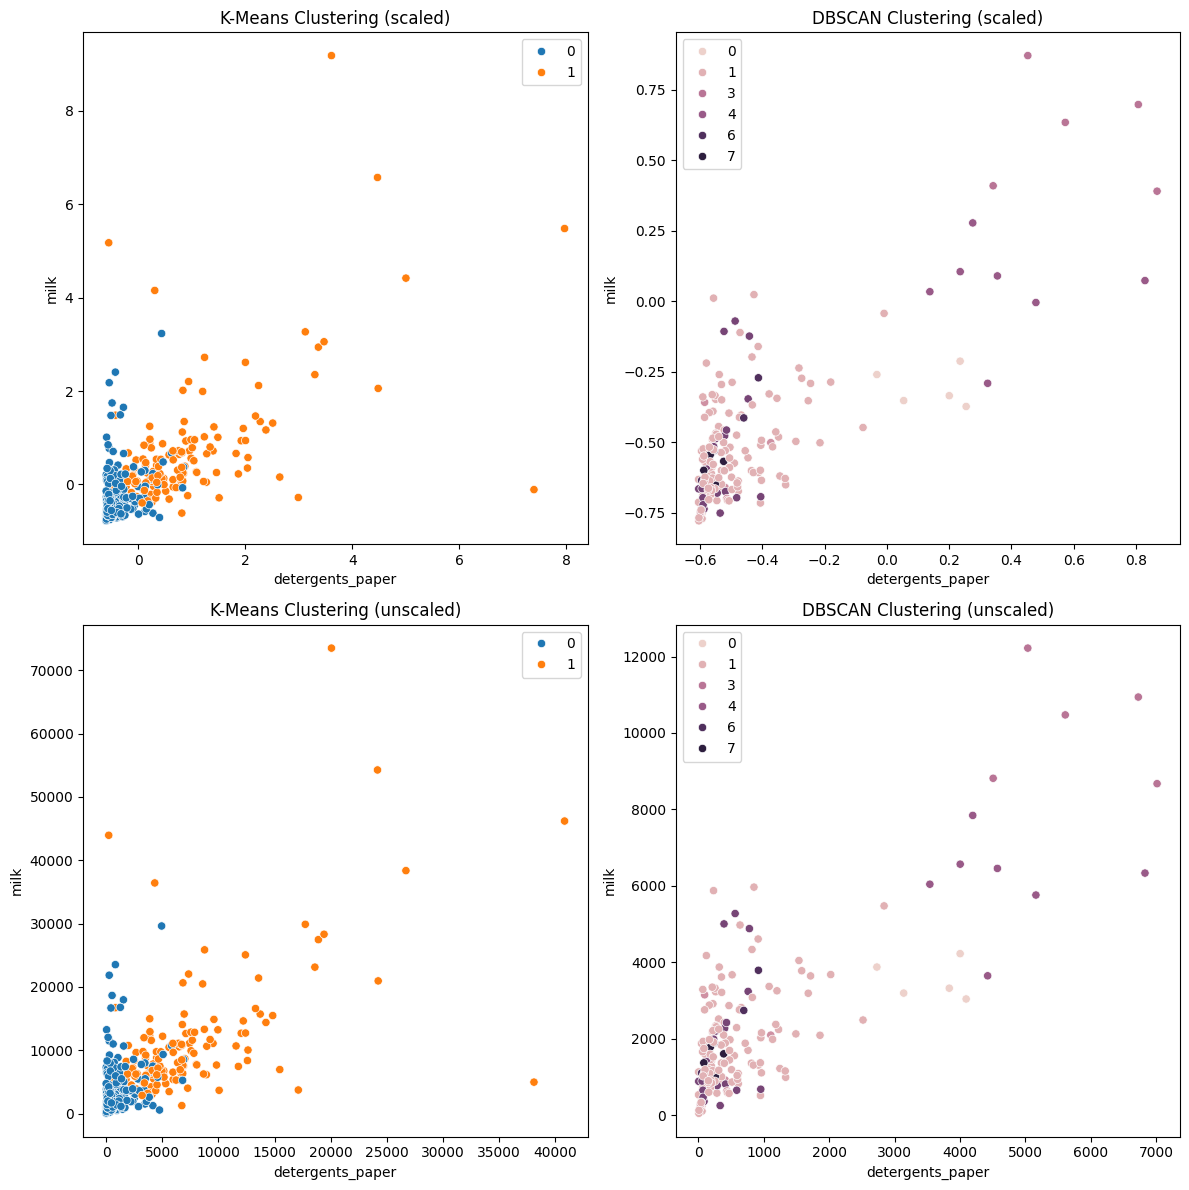

In [39]:
# Your code here:

plt.figure(figsize=(12, 12))

# ---> Scaled data <---
plt.subplot(2, 2, 1)
plot(df_scaled.detergents_paper, df_scaled.milk, kmeans_2_labels)
plt.title("K-Means Clustering (scaled)")

plt.subplot(2, 2, 2)
plot(df_scaled.detergents_paper[mask], df_scaled.milk[mask], dbscan_label[mask])
plt.title("DBSCAN Clustering (scaled)")

# ---> Original (unscaled) data <---
plt.subplot(2, 2, 3)
plot(df.detergents_paper, df.milk, kmeans_2_labels)
plt.title("K-Means Clustering (unscaled)")

plt.subplot(2, 2, 4)
plot(df.detergents_paper[mask], df.milk[mask], dbscan_label[mask])
plt.title("DBSCAN Clustering (unscaled)")

plt.tight_layout()
plt.show()


In [40]:
df.milk.corr(df.detergents_paper)               # colinearity between 'milk' and 'detergents_paper'

np.float64(0.6618156793591071)

- The scatter plot looks almost the same for scaled and unscaled data because scaling does not change the visual pattern, only the distances used by the algorithm.

- K-Means forces customers into groups, so it shows trends clearly.

- Customers who spend less on milk usually also spend less on detergents paper (based on K-Means).

- Customers who spend more on milk often spend more on detergents paper.

- This is a general pattern, not true for every customer.

- DBSCAN does not find clear groups here and shows most customers as one big group.

- This means milk and detergents paper alone are not enough to clearly separate customers.

- which dataset to used scaled or unscaled
how we can compare both Kmeans and DBscan
    both uses different parameters. 

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

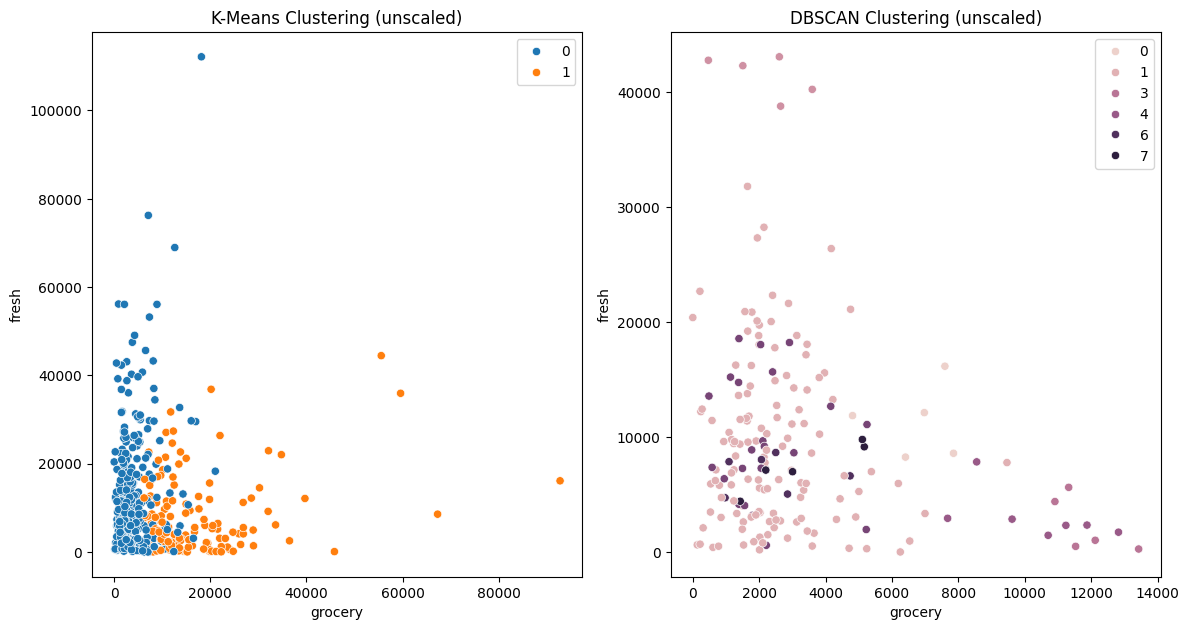

In [41]:
# Your code here:

plt.figure(figsize=(12, 12))

# ---> Scaled data <---
# plt.subplot(2, 2, 1)
# plot(df_scaled.grocery, df_scaled.fresh, kmeans_2_labels)
# plt.title("K-Means Clustering (scaled)")

# plt.subplot(2, 2, 2)
# plot(df_scaled.grocery[mask], df_scaled.fresh[mask], dbscan_label[mask])
# plt.title("DBSCAN Clustering (scaled)")

# ---> Original (unscaled) data <---
plt.subplot(2, 2, 3)
plot(df.grocery, df.fresh, kmeans_2_labels)
plt.title("K-Means Clustering (unscaled)")

plt.subplot(2, 2, 4)
plot(df.grocery[mask], df.fresh[mask], dbscan_label[mask])
plt.title("DBSCAN Clustering (unscaled)")

plt.tight_layout()
plt.show()

- Again k-means algorithm showed two clear groups.
- Customers with low grocery spending mostly fall into one cluster.
- Customers with higher grocery spending are grouped into another cluster.

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

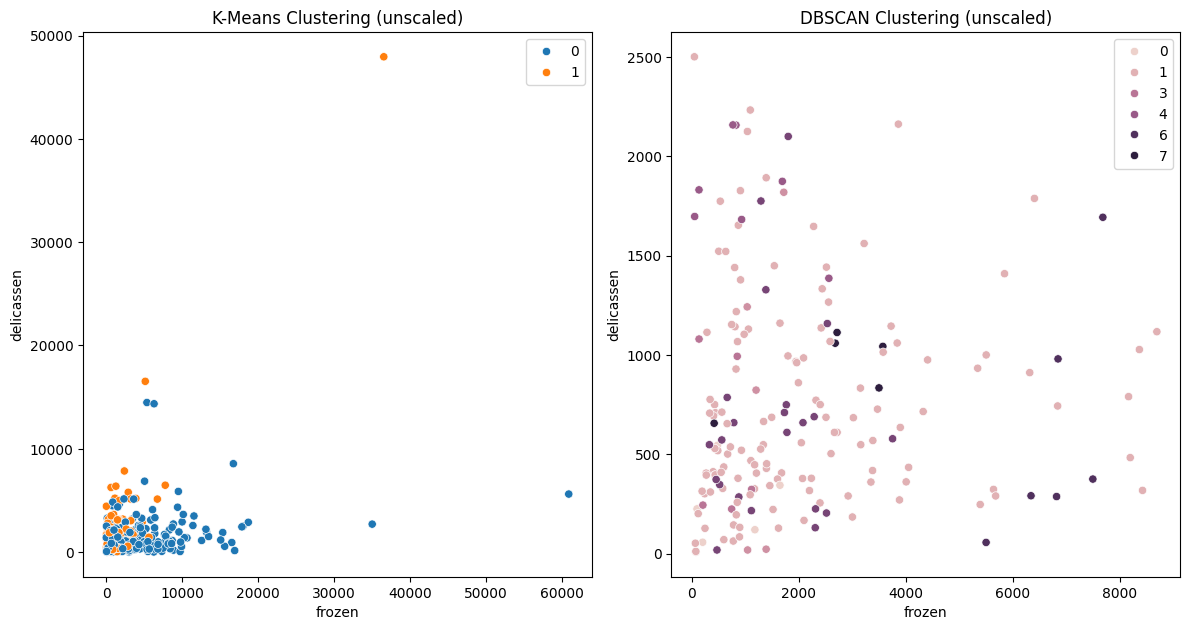

In [42]:
# Your code here:

plt.figure(figsize=(12, 12))

# ---> Scaled data <---
# plt.subplot(2, 2, 1)
# plot(df_scaled.frozen, df_scaled.delicassen, kmeans_2_labels)
# plt.title("K-Means Clustering (scaled)")

# plt.subplot(2, 2, 2)
# plot(df_scaled.frozen[mask], df_scaled.delicassen[mask], dbscan_label[mask])
# plt.title("DBSCAN Clustering (scaled)")

# ---> Original (unscaled) data <---
plt.subplot(2, 2, 3)
plot(df.frozen, df.delicassen, kmeans_2_labels)
plt.title("K-Means Clustering (unscaled)")

plt.subplot(2, 2, 4)
plot(df.frozen[mask], df.delicassen[mask], dbscan_label[mask])
plt.title("DBSCAN Clustering (unscaled)")

plt.tight_layout()
plt.show()


- For low spending in both delicatessen and frozen, it is hard to separate groups with K-Means, and with DBSCAN it is almost impossible, because most customers look similar.

- For higher frozen spending, K-Means starts to separate customers into a different group, mainly because of large spenders.

- In DBSCAN, high frozen spenders appear as isolated points or very small groups, not a clear cluster.

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [43]:
customers_scale_kmeans_label.sample()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmeans_label,elbow_label
363,-0.690297,0.590668,-0.583656,-0.651014,-0.370116,-0.59411,-0.324728,-0.429859,0,0


In [44]:
customers_scale_kmeans_label.groupby('kmeans_label').mean()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,elbow_label
kmeans_label,,,,,,,,,
0,-0.627387,-0.051609,0.123151,-0.336750,-0.421723,0.120532,-0.436340,-0.092852,0.0
1,1.432689,0.117853,-0.281225,0.768997,0.963039,-0.275244,0.996418,0.212034,1.0


In [45]:
customers_scale_kmeans_label['dbscan_label'] = dbscan_label
customers_scale_kmeans_label.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmeans_label,elbow_label,dbscan_label
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,1,-1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,1,-1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,1,-1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,0,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,1,-1


In [46]:
len(customers_scale_kmeans_label.dbscan_label[mask])

185

In [47]:
# Your code here:

customers_scale_kmeans_label.groupby('dbscan_label').mean()


,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmeans_label,elbow_label
dbscan_label,,,,,,,,,,
-1,0.358207,-0.119217,0.136885,0.347752,0.372203,0.149113,0.309780,0.197238,0.458824,0.458824
0,1.448652,0.590668,-0.047439,-0.306575,-0.128764,-0.484978,0.142681,-0.449668,1.000000,1.000000
1,-0.690297,0.590668,-0.227300,-0.533618,-0.582337,-0.193952,-0.500777,-0.277938,0.000000,0.000000
2,-0.690297,0.590668,2.330913,-0.593472,-0.609298,-0.370277,-0.517654,-0.262725,0.000000,0.000000
3,1.448652,0.590668,-0.763329,0.600725,0.412071,-0.507786,0.608619,-0.337985,1.000000,1.000000
4,1.448652,0.590668,-0.707052,0.040639,0.253227,-0.428514,0.376715,0.107053,1.000000,1.000000
5,-0.690297,-1.995342,-0.171174,-0.548618,-0.609922,-0.321448,-0.534924,-0.303818,0.000000,0.000000
6,-0.690297,-1.995342,-0.409825,-0.522690,-0.587695,0.764752,-0.523890,-0.323478,0.000000,0.000000
7,-0.690297,-0.702337,-0.356662,-0.577682,-0.481258,-0.102396,-0.557298,-0.207274,0.000000,0.000000


In [48]:
df.sample()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
32,1,3,21632,1318,2886,266,918,405


In [49]:
df['kmean_label'] = kmeans_2_labels
df['dbscan_label'] = dbscan_label

df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmean_label,dbscan_label
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


In [50]:
df.groupby('kmean_label').mean()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,dbscan_label
kmean_label,,,,,,,,,
0,1.029412,2.503268,13556.055556,3313.748366,3948.130719,3656.408497,803.454248,1263.316993,0.598039
1,1.992537,2.634328,8447.597015,11465.298507,17092.791045,1737.231343,7626.865672,2122.149254,-0.552239


In [51]:
df.groupby('dbscan_label').mean()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,kmean_label
dbscan_label,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.458824
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000


Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [52]:
# Your code here:
for i in range(2, 20):
        
    kmeans = KMeans(n_clusters= i, random_state= 42, n_init= 20)
    kmeans.fit(customers_scale_kmeans)

    labels = kmeans.labels_
    score = silhouette_score(customers_scale_kmeans, labels)
    print(f"k = {i}, s_score  = {score:.3f} ")

k = 2, s_score  = 0.373 
k = 3, s_score  = 0.357 
k = 4, s_score  = 0.344 
k = 5, s_score  = 0.353 
k = 6, s_score  = 0.353 
k = 7, s_score  = 0.364 
k = 8, s_score  = 0.363 
k = 9, s_score  = 0.361 
k = 10, s_score  = 0.331 
k = 11, s_score  = 0.362 
k = 12, s_score  = 0.351 
k = 13, s_score  = 0.339 
k = 14, s_score  = 0.338 
k = 15, s_score  = 0.316 
k = 16, s_score  = 0.302 
k = 17, s_score  = 0.220 
k = 18, s_score  = 0.273 
k = 19, s_score  = 0.251 


**Your comment here**

-  The highest silhoutte score was acheived when cluster value was 2.

- So it can be concluded that kmeans performed best when number of clusters is 2.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [53]:
# Your code here

for i in range (1, 12, 2):
    for j in range(5, 30, 5):
        dbscan = DBSCAN(eps= i, min_samples=j)
        dbscan_label = dbscan.fit_predict(customers_scale_dbscan)

        # Silhoutte Score
        dbscan_score_1 = silhouette_score(customers_scale_dbscan, dbscan_label)*100
        print(f"eps: {i}, min_samples: {j}, score: {dbscan_score_1:.2f}%")

eps: 1, min_samples: 5, score: 15.63%
eps: 1, min_samples: 10, score: 17.23%
eps: 1, min_samples: 15, score: 16.16%
eps: 1, min_samples: 20, score: 24.11%
eps: 1, min_samples: 25, score: 23.11%
eps: 3, min_samples: 5, score: 68.66%
eps: 3, min_samples: 10, score: 68.66%
eps: 3, min_samples: 15, score: 68.66%
eps: 3, min_samples: 20, score: 68.66%
eps: 3, min_samples: 25, score: 68.66%
eps: 5, min_samples: 5, score: 74.95%
eps: 5, min_samples: 10, score: 74.47%
eps: 5, min_samples: 15, score: 74.47%
eps: 5, min_samples: 20, score: 74.47%
eps: 5, min_samples: 25, score: 74.47%
eps: 7, min_samples: 5, score: 82.64%
eps: 7, min_samples: 10, score: 82.64%
eps: 7, min_samples: 15, score: 82.64%
eps: 7, min_samples: 20, score: 82.64%
eps: 7, min_samples: 25, score: 82.64%
eps: 9, min_samples: 5, score: 82.64%
eps: 9, min_samples: 10, score: 82.64%
eps: 9, min_samples: 15, score: 82.64%
eps: 9, min_samples: 20, score: 82.64%
eps: 9, min_samples: 25, score: 82.64%
eps: 11, min_samples: 5, score

**Your comment here**

- It is clearl evident that eps>7 and min samples> 5 does not increase the scores.
-  This means it is the value eps= 7 and min_sample = 5 when dbscan acheived higest score. 
